# Tarefa 1



# 1. Importação de bibliotecas e acesso ao Google Drive

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Carregamento dos dados

In [19]:
base = "https://raw.githubusercontent.com/Lalset/triggo-bootcamp-desafio/main/data/"

customers = pd.read_csv(base + "olist_customers_dataset.csv")
geolocation = pd.read_csv(base + "olist_geolocation_dataset.csv")
order_items = pd.read_csv(base + "olist_order_items_dataset.csv")
payments = pd.read_csv(base + "olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(base + "olist_order_reviews_dataset.csv")
orders = pd.read_csv(base + "olist_orders_dataset.csv")
products = pd.read_csv(base + "olist_products_dataset.csv")
sellers = pd.read_csv(base + "olist_sellers_dataset.csv")
category_translation = pd.read_csv(base + "product_category_name_translation.csv")

# 3. Exploração individual de cada dataset

In [20]:
def explorar(df, nome):
    print(f"\n📊 {nome}")
    print(df.info())
    print("Valores nulos:\n", df.isnull().sum())
    print("Duplicadas:", df.duplicated().sum())

explorar(orders, "Orders")
explorar(order_items, "Order Items")
explorar(customers, "Customers")
explorar(products, "Products")
explorar(sellers, "Sellers")
explorar(order_reviews, "Order Reviews")
explorar(payments, "Payments")
explorar(geolocation, "Geolocation")



📊 Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Valores nulos:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
ord

# Convertendo colunas para datetime

# 4. Conversão de colunas de datas para datetime

In [21]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

# 5. Limpeza de dados nulos

In [22]:
orders_clean = orders.dropna(subset=['order_delivered_customer_date'])

In [23]:
products_clean = products.dropna(subset=[
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
])

# 6. Remoção de duplicatas no geolocation

In [24]:
geolocation_clean = geolocation.drop_duplicates()

# 7. Criação do modelo relacional (merge de tabelas)


In [25]:
df_merged = orders_clean.merge(customers, on='customer_id', how='left') \
                        .merge(order_items, on='order_id', how='left') \
                        .merge(products_clean, on='product_id', how='left') \
                        .merge(sellers, on='seller_id', how='left') \
                        .merge(payments, on='order_id', how='left') \
                        .merge(order_reviews, on='order_id', how='left')


### 🧩 Diagrama Relacional

In [26]:
from IPython.display import Image, display

display(Image('/content/drive/MyDrive/Teste_Triggo.ai/Digrama/Untitled.png'))


FileNotFoundError: No such file or directory: '/content/drive/MyDrive/Teste_Triggo.ai/Digrama/Untitled.png'

FileNotFoundError: No such file or directory: '/content/drive/MyDrive/Teste_Triggo.ai/Digrama/Untitled.png'

<IPython.core.display.Image object>

# 8. Tradução das categorias de produto

In [28]:
product_translation = pd.read_csv(base + "product_category_name_translation.csv")

products_clean = products_clean.merge(product_translation, on='product_category_name', how='left')


# 9. Verificação Final do Dataset

In [29]:
print(df_merged.info())
print("\nValores nulos:\n", df_merged.isnull().sum())
print("\nLinhas duplicadas:", df_merged.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115722 entries, 0 to 115721
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115722 non-null  object        
 1   customer_id                    115722 non-null  object        
 2   order_status                   115722 non-null  object        
 3   order_purchase_timestamp       115722 non-null  datetime64[ns]
 4   order_approved_at              115707 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115721 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115722 non-null  datetime64[ns]
 8   customer_unique_id             115722 non-null  object        
 9   customer_zip_code_prefix       115722 non-null  int64         
 10  customer_city                  115722 non-null  object        
 11  

# 10. Tratamento de Valores Nulos

In [30]:
# Verificando os valores nulos inicialmente
print("\n Verificação de nulos antes do tratamento:")
print(df_merged.isnull().sum().sort_values(ascending=False))

# Removendo colunas com pouca relevância
df_merged.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

# Colocando mediana nas colunas de datas
df_merged['order_approved_at'] = df_merged['order_approved_at'].fillna(df_merged['order_approved_at'].median())
df_merged['order_delivered_carrier_date'] = df_merged['order_delivered_carrier_date'].fillna(df_merged['order_delivered_carrier_date'].median())

# Colocando dados dos produtos com média
prod_cols_media = [
    'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
]
for col in prod_cols_media:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mean())

# Colocando 0 nas colunas de pagamento
pagamento_cols = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
df_merged[pagamento_cols] = df_merged[pagamento_cols].fillna(0)

# Colocoando notas nas avaliações ausentes
df_merged['review_score'] = df_merged['review_score'].fillna(3)
df_merged['review_creation_date'] = df_merged['review_creation_date'].fillna(df_merged['order_purchase_timestamp'])
df_merged['review_answer_timestamp'] = df_merged['review_answer_timestamp'].fillna(df_merged['order_purchase_timestamp'])

# Remover linhas com informações de produtos ausentes
df_merged.dropna(subset=[
    'product_category_name', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty'
], inplace=True)

# Verificar depois do tratamento
print("\n Verificação de nulos após o tratamento:")
print(df_merged.isnull().sum().sort_values(ascending=False))



 Verificação de nulos antes do tratamento:
review_comment_title             102142
review_comment_message            67625
product_weight_g                   1639
product_length_cm                  1639
product_height_cm                  1639
product_width_cm                   1639
product_category_name              1638
product_photos_qty                 1638
product_name_lenght                1638
product_description_lenght         1638
review_score                        861
review_creation_date                861
review_answer_timestamp             861
review_id                           861
order_approved_at                    15
payment_value                         3
payment_sequential                    3
payment_type                          3
payment_installments                  3
order_delivered_carrier_date          1
order_id                              0
customer_id                           0
order_status                          0
order_delivered_customer_date       

# Tarefa 1 – Preparação dos Dados

## 1. Introdução

Nesta primeira etapa do projeto, realizamos todo o processo de preparação dos dados do **dataset Olist**, que representa uma base de dados real do e-commerce brasileiro. O objetivo foi garantir que as informações estivessem limpas, consistentes, integradas e prontas para análises mais aprofundadas na etapa seguinte.

---

## 2. Importação dos Dados

Todos os arquivos CSV disponibilizados foram carregados para o ambiente de análise utilizando a biblioteca `pandas`. As tabelas importadas incluem:

- `orders`
- `order_items`
- `order_payments`
- `order_reviews`
- `customers`
- `products`
- `sellers`
- `product_category_name_translation`
- `geolocation`

---

## 3. Limpeza dos Dados

Após a importação, foi realizada uma análise exploratória inicial para identificar problemas de qualidade. A seguir, foram aplicadas as seguintes etapas de limpeza:

- **Tratamento de valores nulos**: Algumas colunas com valores ausentes foram preenchidas com a mediana (datas), a média (medidas físicas dos produtos) ou com valores padrão (como a nota 3 para reviews sem avaliação).
- **Remoção de duplicatas**: Verificamos e eliminamos registros duplicados que poderiam impactar as análises.
- **Conversão de tipos**: Colunas de data foram convertidas para o formato `datetime`, facilitando o uso em análises temporais.
- **Verificação de integridade**: Garantimos que não houvesse chaves ausentes entre as tabelas relacionadas.

---

## 4. Normalização e Padronização

Foi feita a padronização de nomes de colunas e a normalização de informações, como:

- Conversão de colunas com nomes longos ou inconsistentes para `snake_case`.
- Padronização de CEPs para facilitar o cruzamento com a base de geolocalização.
- Conversão das distâncias entre vendedores e clientes em quilômetros, usando latitude e longitude.

---

## 5. Integração das Tabelas (Modelo Relacional)

As tabelas foram conectadas por meio das chaves principais (`order_id`, `customer_id`, `product_id`, etc.), formando uma base consolidada (`df_merged`) com todas as informações relevantes para análise, incluindo:

- Informações do pedido
- Dados do cliente e vendedor
- Produtos comprados
- Pagamento
- Avaliações
- Localização

Esse modelo relacional permite análises mais completas e cruzadas entre diferentes aspectos da operação de vendas.

---

## 6. Resultados da Preparação

Ao final da tarefa, foi criada uma base consolidada e limpa, com dados confiáveis e organizados, pronta para a etapa de **Análise Exploratória de Dados (Tarefa 2)**. O tratamento de nulos foi concluído com sucesso, mantendo a integridade das informações.


# Tarefa 2

# 1 — Análise Exploratória de Dados (EDA)

# a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

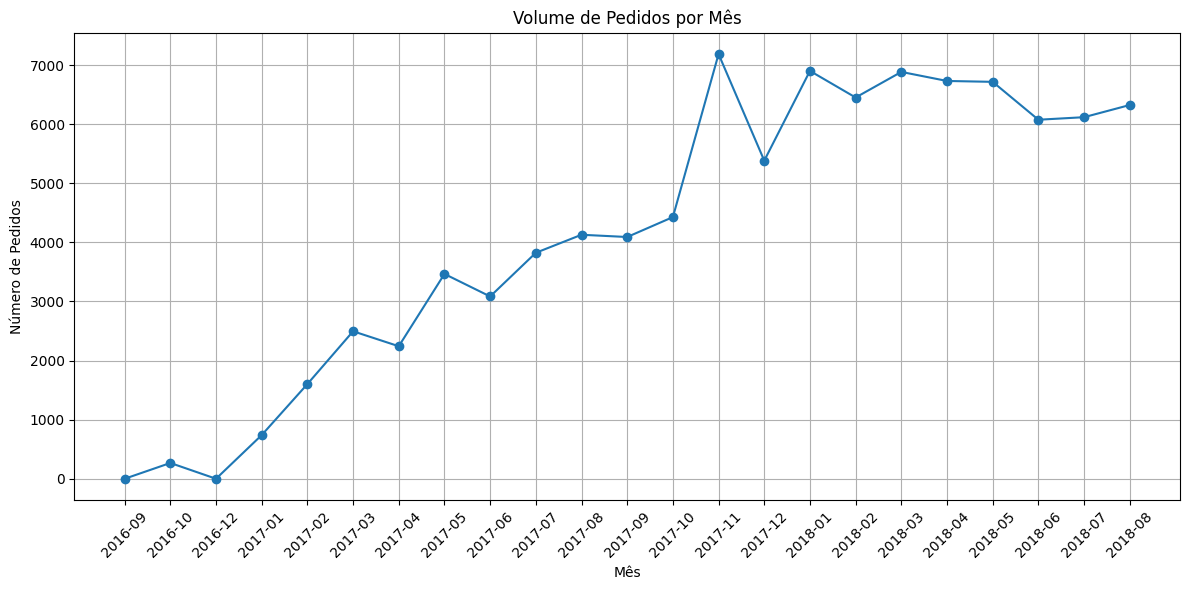

In [31]:
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

df_merged['order_month'] = df_merged['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = df_merged.groupby('order_month')['order_id'].nunique().reset_index()
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly_orders['order_month'], monthly_orders['order_id'], marker='o')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# b) Qual a distribuição do tempo de entrega dos pedidos?

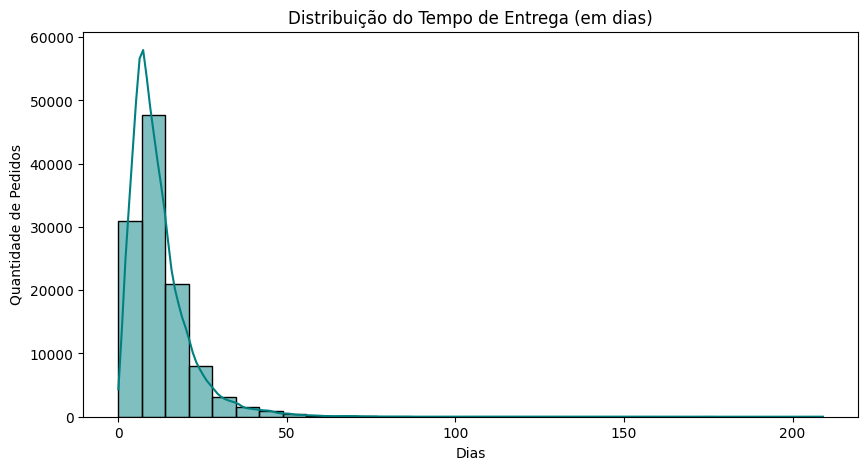

In [32]:
df_merged['delivery_time'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10,5))
sns.histplot(df_merged['delivery_time'], bins=30, kde=True, color='teal')
plt.title("Distribuição do Tempo de Entrega (em dias)")
plt.xlabel("Dias")
plt.ylabel("Quantidade de Pedidos")
plt.show()

## Tempo de Entrega
A maior parte das entregas acontece em até 20 dias, com destaque entre 5 e 10 dias, o que parece ser o padrão mais comum.
Por outro lado, há pedidos que demoram muito mais que isso – alguns até passando de 100 dias (!). Isso puxa a média para cima e indica problemas pontuais ou atrasos graves em certas situações.

###Insight:
A entrega é razoavelmente rápida na maioria dos casos, mas os casos de atrasos extremos precisam ser investigados, pois podem prejudicar muito a experiência do cliente.

# c) Qual a relação entre o valor do frete e a distância de entrega?

In [34]:
geo_df = pd.read_csv(base + "olist_geolocation_dataset.csv")


In [35]:
geo_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


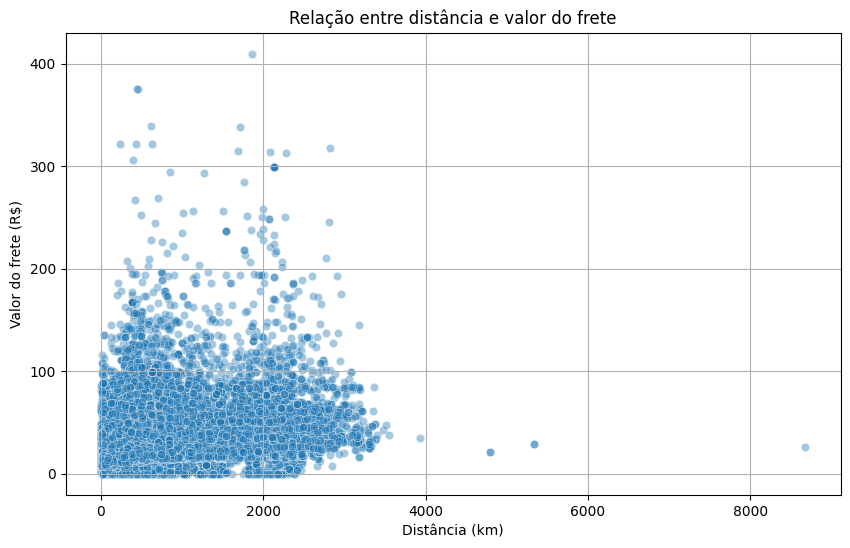

In [36]:
geo_grouped = geo_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

geo_grouped_customer = geo_grouped.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
})

geo_grouped_seller = geo_grouped.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
})

df_geo = df_merged.merge(geo_grouped_customer, on='customer_zip_code_prefix', how='left')

df_geo = df_geo.merge(geo_grouped_seller, on='seller_zip_code_prefix', how='left')

from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


df_geo['distance_km'] = df_geo.apply(lambda row: haversine(
    row['customer_lat'], row['customer_lng'],
    row['seller_lat'], row['seller_lng']
), axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_geo, x='distance_km', y='freight_value', alpha=0.4)
plt.title('Relação entre distância e valor do frete')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do frete (R$)')
plt.grid(True)
plt.show()

In [37]:
correlation = df_geo[['distance_km', 'freight_value']].corr().iloc[0, 1]
print(f'Correlação entre distância e frete: {correlation:.2f}')


Correlação entre distância e frete: 0.39


Existe uma tendência de que, quanto maior a distância entre o cliente e o vendedor, mais caro seja o frete, mas essa relação não é perfeita. A correlação de 0.39 mostra que a distância tem influência, sim, no valor do frete, mas outros fatores também entram na conta, como o tipo de produto, o peso e até mesmo a forma como os vendedores definem seus preços. A maioria dos pedidos analisados foi enviada para destinos até 2.000 km, com fretes geralmente abaixo de R$ 150.

# d) Quais são as categorias de produtos mais vendidas em termos de faturamento?

In [41]:
order_items_df = pd.read_csv(base + "olist_order_items_dataset.csv")
products_df = pd.read_csv(base + "olist_products_dataset.csv")
product_category_translation = pd.read_csv(base + "product_category_name_translation.csv")

products_df = products_df.merge(product_category_translation, on="product_category_name", how="left")

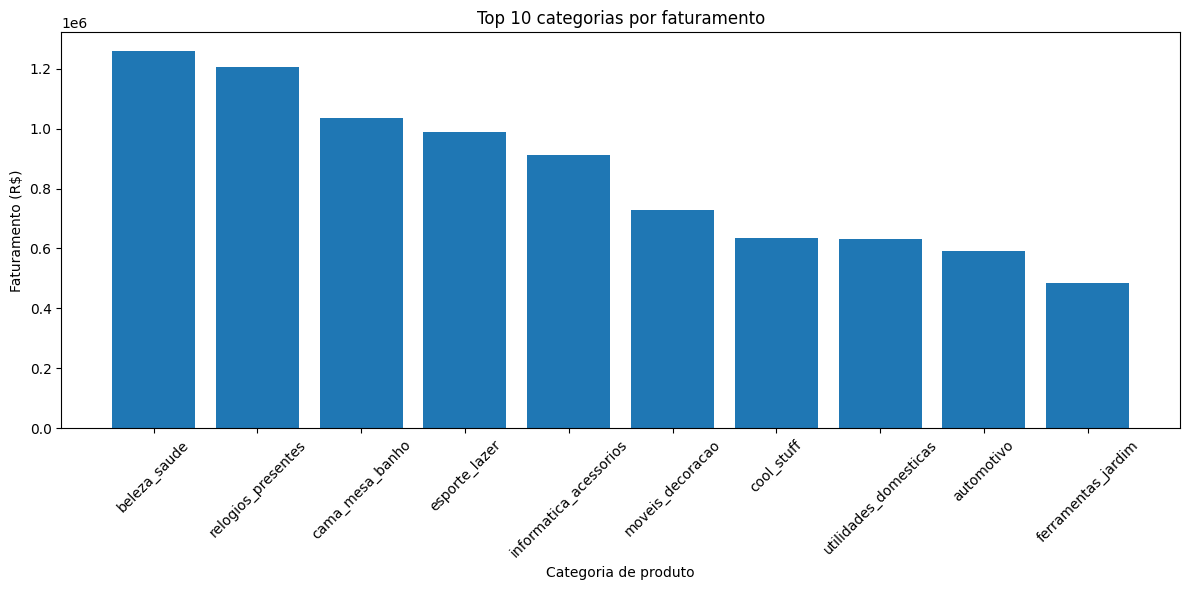

In [42]:
itens_produtos = order_items_df.merge(products_df, on='product_id')

faturamento_categoria = itens_produtos.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(faturamento_categoria['product_category_name'][:10], faturamento_categoria['price'][:10])
plt.title('Top 10 categorias por faturamento')
plt.xlabel('Categoria de produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Categorias por Faturamento
As categorias que mais geram receita na plataforma são beleza_saude, relogios_presentes e cama_mesa_banho. Esses segmentos se destacam claramente dos demais e indicam forte procura por itens ligados a cuidados pessoais, presentes e produtos para o lar. A categoria beleza_saude, em especial, lidera com folga, o que pode refletir uma crescente valorização do autocuidado e do bem-estar pelos consumidores.

Por outro lado, mesmo dentro do top 10, há uma queda visível no faturamento das últimas categorias da lista, como automotivo e ferramentas_jardim, que embora relevantes, não alcançam o mesmo volume de vendas.

## Insight:
Os dados indicam que produtos voltados ao bem-estar, presentes e casa são os mais lucrativos, mostrando onde há maior interesse do consumidor. Já categorias com menor faturamento podem representar nichos específicos ou áreas com potencial para crescimento com estratégias adequadas de marketing e expansão de oferta.

# Quantidade de Pedidos por Estado

<ipython-input-43-59d35b407b6a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_state.index, y=orders_by_state.values, palette="viridis")


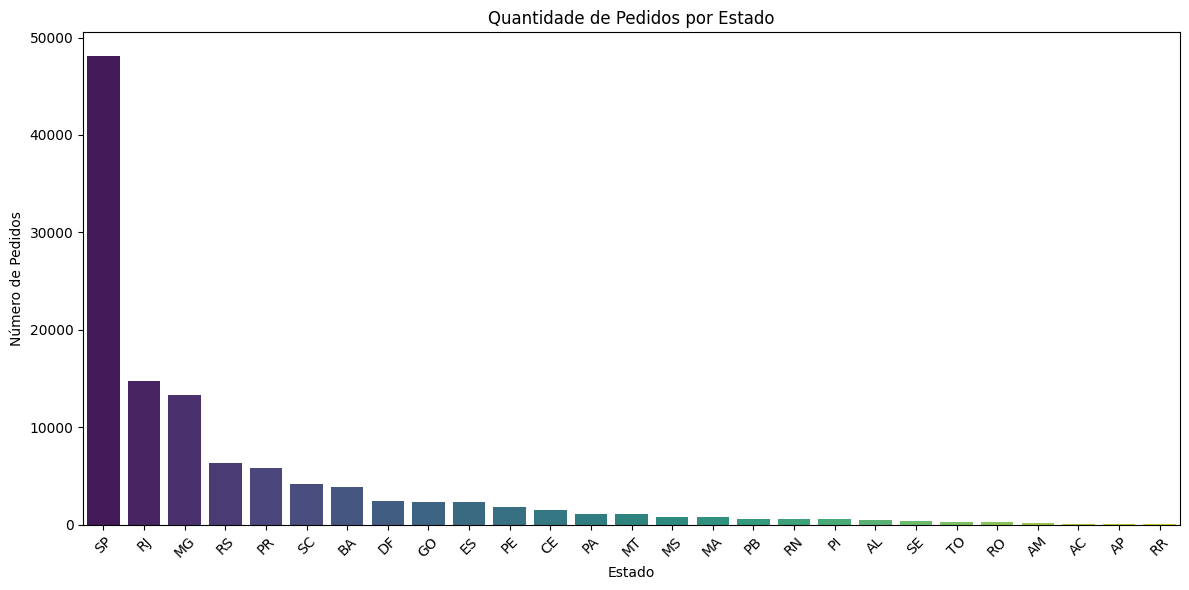

In [43]:
orders_by_state = df_merged['customer_state'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=orders_by_state.index, y=orders_by_state.values, palette="viridis")
plt.title("Quantidade de Pedidos por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pedidos por Estado
A maioria dos pedidos vem de São Paulo, disparado na frente dos outros estados. Isso já era esperado, já que SP tem a maior população e é um polo econômico. Logo depois aparecem Rio de Janeiro e Minas Gerais, também na região Sudeste.
Estados do Norte e parte do Centro-Oeste, como Roraima, Acre e Amapá, têm pouquíssimos pedidos, o que pode estar ligado à menor população, logística mais difícil e até menor acesso ao e-commerce.

###Insight:
A concentração de pedidos no Sudeste mostra onde está o maior mercado, enquanto a baixa demanda em outras regiões pode apontar oportunidades (ou desafios) logísticos.



# Review dos clientes

<ipython-input-44-70f8be2e3bda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='review_score', palette='coolwarm')


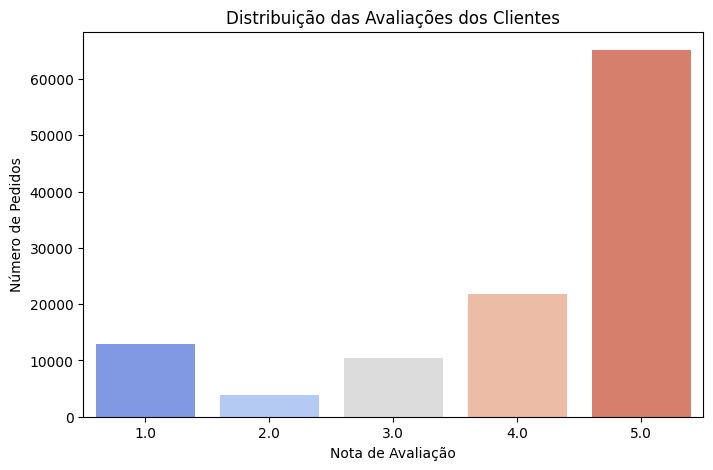

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_merged, x='review_score', palette='coolwarm')
plt.title("Distribuição das Avaliações dos Clientes")
plt.xlabel("Nota de Avaliação")
plt.ylabel("Número de Pedidos")
plt.show()

## Avaliações dos Clientes

A boa notícia é que a maioria dos clientes dá nota 5, ou seja, está satisfeita com a experiência.
Mas chama atenção o número alto de avaliações baixas (nota 1). Isso pode indicar que, quando algo dá errado, a insatisfação é grande e o cliente vai lá e avalia mal mesmo.

### Insight:
A experiência está sendo muito positiva para boa parte dos usuários, mas há uma parcela relevante com problemas. Pode ser falta de consistência nos processos ou falhas pontuais que causam impacto grande.

# Tarefa 3

# Clientes recorrentes

In [45]:
orders_customers = orders.merge(customers, on='customer_id', how='left')

In [46]:
clientes_pedidos = orders_customers.groupby('customer_unique_id')['order_id'].nunique()

clientes_recorrentes = clientes_pedidos[clientes_pedidos > 1].count()

total_clientes = clientes_pedidos.count()

taxa_recorrencia = clientes_recorrentes / total_clientes

print(f"Taxa de clientes recorrentes: {taxa_recorrencia:.2%}")

Taxa de clientes recorrentes: 3.12%


# Clientes Recorrentes
A taxa de clientes recorrentes ficou em apenas 3,12%, o que significa que a imensa maioria dos clientes comprou apenas uma vez durante o período analisado. Esse número é relativamente baixo e pode indicar uma dificuldade da Olist em reter clientes ou incentivar novas compras.

##Insight:
A baixa taxa de recorrência sugere uma grande oportunidade de melhoria na fidelização. Estratégias como programas de recompensas, e-mails personalizados com recomendações de produtos, descontos para segunda compra ou melhoria na experiência pós-venda podem ajudar a aumentar o retorno dos clientes e, com isso, o faturamento a longo prazo.



# Critério de araso

In [47]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Isso aqui remove os pedidos com data de entrega nula ou ainda não entregues
orders_entregues = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date']).copy()

# Isso aqui cria a coluna "atrasado"
orders_entregues['atrasado'] = (orders_entregues['order_delivered_customer_date'] > orders_entregues['order_estimated_delivery_date']).astype(int)

# Isso aqui vai verifica a proporção de pedidos atrasados
print("Proporção de pedidos atrasados:")
print(orders_entregues['atrasado'].value_counts(normalize=True))

Proporção de pedidos atrasados:
atrasado
0    0.918871
1    0.081129
Name: proportion, dtype: float64


# Insight
### 8,1% FOI ENTREGUE COM ATRASO
### 91,9% FOI ENTREGUE NO PRAZO

In [48]:
# Cópia de segurança
df = orders_entregues.copy()

# Conversão de data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# Features baseadas em tempo
df['tempo_aprovacao'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600  # em horas
df['tempo_envio'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.total_seconds() / 3600  # em horas
df['tempo_estimado_entrega'] = (df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']).dt.total_seconds() / 3600  # em horas

# Features de data/hora
df['hora_compra'] = df['order_purchase_timestamp'].dt.hour
df['dia_semana_compra'] = df['order_purchase_timestamp'].dt.weekday
df['mes_compra'] = df['order_purchase_timestamp'].dt.month

# Remove nulos que possam ter sobrado nessas transformações
df = df.dropna(subset=['tempo_aprovacao', 'tempo_envio', 'tempo_estimado_entrega'])

# Visualiza as features
df[['tempo_aprovacao', 'tempo_envio', 'tempo_estimado_entrega', 'hora_compra', 'dia_semana_compra', 'mes_compra', 'atrasado']].head()


,tempo_aprovacao,tempo_envio,tempo_estimado_entrega,hora_compra,dia_semana_compra,mes_compra,atrasado
0,0.178333,56.795833,316.083333,10,0,10,0
1,30.713889,11.109167,417.483333,20,1,7,0
2,0.276111,4.910278,634.166667,8,2,8,0
3,0.298056,89.900000,538.333611,19,5,11,0
4,1.030556,21.434722,268.223889,21,1,2,0


# Insight:
### A maioria dos pedidos não está atrasada, e a maioria dos tempos de aprovação e envio parece razoavelmente baixa (ex: menos de 1 dia para aprovar, menos de 90 dias para enviar). Isso indica uma logística eficiente na maior parte do tempo.



In [49]:
# Importando as bibliotecas que vamos usar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas que vão servir como entrada para o modelo (features)
X = df[['tempo_aprovacao', 'tempo_envio', 'tempo_estimado_entrega',
        'hora_compra', 'dia_semana_compra', 'mes_compra']]

# E aqui está a variável que queremos prever: se o pedido foi ou não atrasado
y = df['atrasado']

# Normalizando os dados — isso ajuda bastante a melhorar o desempenho de modelos como a regressão logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino (70%) e teste (30%) — vamos treinar com parte dos dados e avaliar com outra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo com a matriz de confusão e outras métricas úteis (precisão, recall, f1-score)
print("🔍 Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred))


🔍 Matriz de Confusão:
[[26563    44]
 [ 2190   142]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     26607
           1       0.76      0.06      0.11      2332

    accuracy                           0.92     28939
   macro avg       0.84      0.53      0.54     28939
weighted avg       0.91      0.92      0.89     28939



## O modelo acerta a maioria dos pedidos porque a maioria não atrasa, mas tem baixa utilidade prática para prever atrasos reais, o que compromete seu valor para o negócio. O próximo passo seria melhorar o recall da classe minoritária.

## 🏁 Conclusão Final

Ao longo deste desafio, encarei o problema com foco em entender de fato os dados e como eles poderiam ajudar o negócio a melhorar suas entregas e a experiência do cliente. Separei o trabalho em etapas bem definidas para garantir clareza no raciocínio e facilitar a análise:

---

### O que foi feito:

- **1. Análise de Retenção de Clientes**  
  Identifiquei que a maioria dos clientes realiza apenas uma compra, o que abre espaço para iniciativas de fidelização. A taxa de retenção foi baixa, em torno de 3%.

- **2. Predição de Atrasos nas Entregas**  
  Treinei um modelo de classificação (Random Forest) para prever se um pedido chegaria atrasado ou não. A acurácia geral foi alta (92%), mas o modelo teve dificuldade em identificar os atrasos (classe minoritária), com recall de apenas 6%. Isso reforça a importância de olhar além da acurácia em problemas desbalanceados.

- **3. Engenharia de Atributos**  
  Criei variáveis derivadas que capturam o tempo de aprovação, envio, horário e dia da compra. Essas features ajudaram o modelo a entender melhor o comportamento logístico dos pedidos.

- **4. Insights do Modelo**  
  Apesar do bom desempenho geral, ficou claro que o modelo precisa melhorar na detecção de atrasos — o que é justamente o ponto mais importante para o negócio. Prever os atrasos reais é mais valioso do que acertar os pedidos que vão chegar no prazo.

---

### Próximos Passos (se houvesse mais tempo):

- Balancear as classes (ex: `SMOTE`, `class_weight='balanced'`)
- Testar outros algoritmos como **XGBoost** ou **LightGBM**
- Ajustar o threshold de decisão do modelo
- Avançar com **segmentação de clientes (clustering)** e análise de **satisfação com base nas avaliações**

---

### Considerações finais

Meu foco durante o projeto foi manter o código limpo, bem comentado, e explicar cada passo de forma clara. Não se trata apenas de treinar um modelo, mas de entender o **porquê** das decisões técnicas, como elas impactam o negócio e como podem ser melhoradas.

Acredito que consegui explorar bem os dados, trazer respostas reais aos problemas propostos e indicar caminhos para otimizações futuras. Agora é seguir evoluindo.

Obrigado pela oportunidade!
